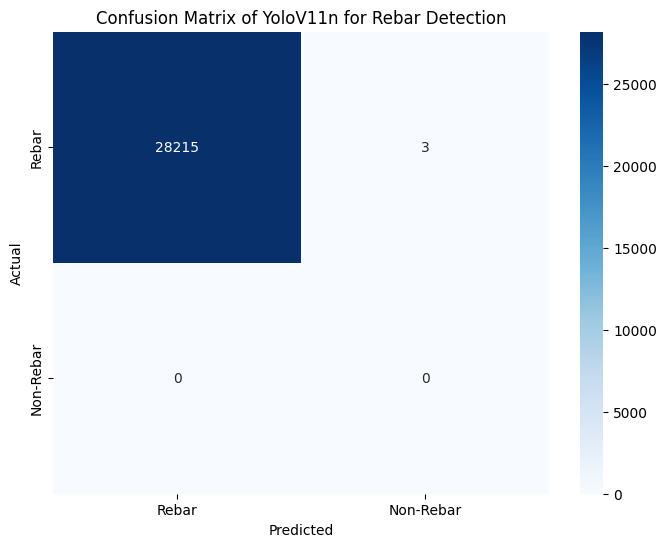

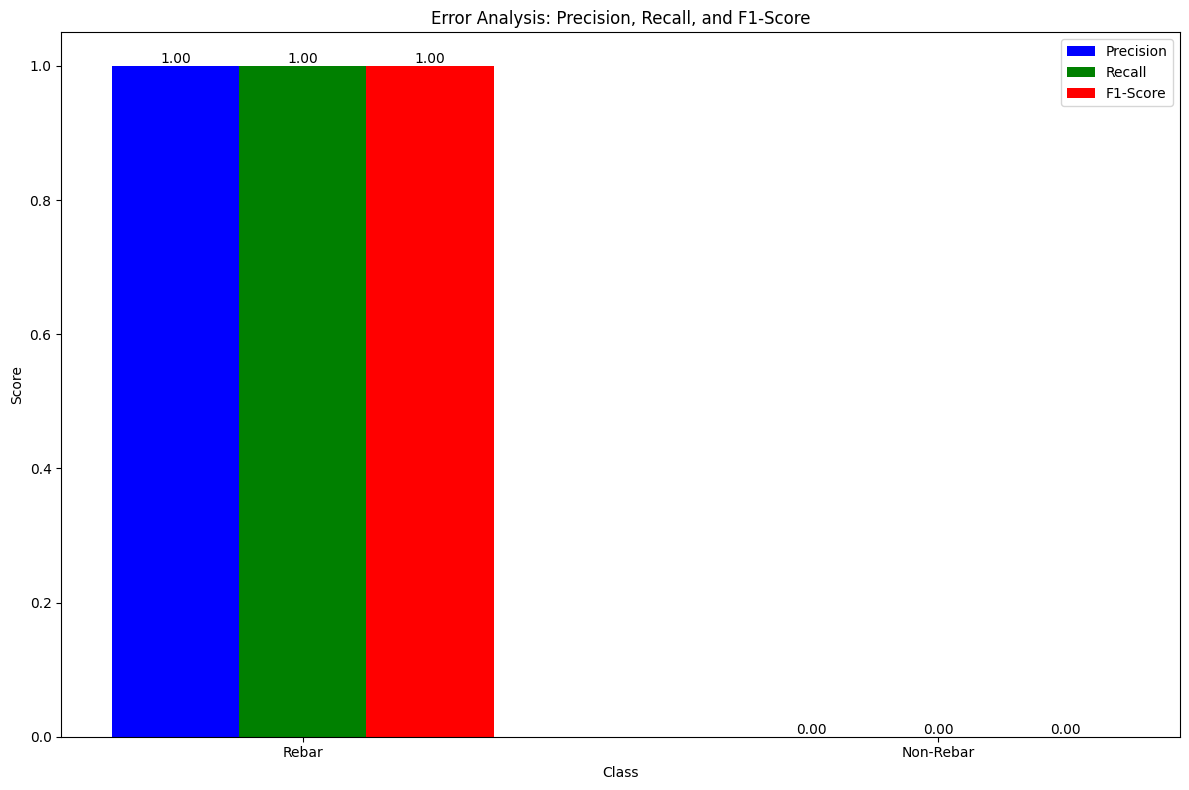

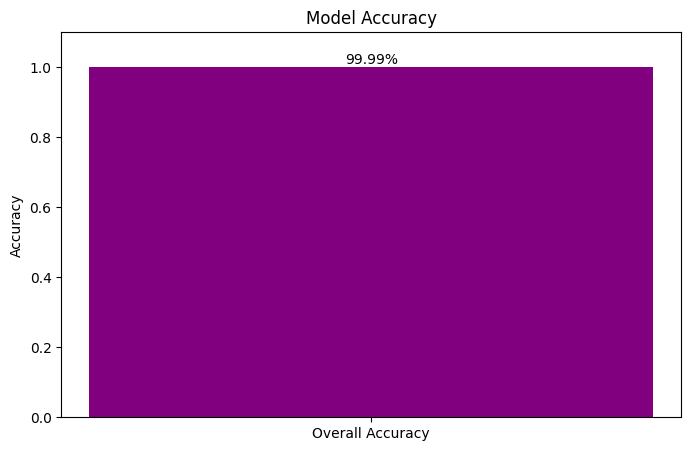


Error Analysis Report:
Class: ['Rebar', 'Non-Rebar']
Precision: [1. 0.]
Recall: [0.99989368 0.        ]
F1-Score: [0.99994684 0.        ]
Total Predictions: [28215     3]
Correct Predictions: [28215     0]
Misclassifications: [3 0]

Sklearn Classification Report:
              precision    recall  f1-score   support

       Rebar       1.00      1.00      1.00     28215
   Non-Rebar       0.00      0.00      0.00         3

    accuracy                           1.00     28218
   macro avg       0.50      0.50      0.50     28218
weighted avg       1.00      1.00      1.00     28218



/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/freshliannes.rosal/anaconda3/envs/Numerical/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix data (TN, FP, FN, TP)
confusion_data = np.array([
    [28215, 3],  # True Negatives (Rebar) | False Positives
    [0, 0]     # False Negatives | True Positives (Non-Rebar)
])

# Labels for the confusion matrix
labels = ["Rebar", "Non-Rebar"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_data, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of YoloV11n for Rebar Detection")
plt.show()

# Compute metrics safely (avoid division by zero)
with np.errstate(divide='ignore', invalid='ignore'):
    precision = np.diag(confusion_data) / np.sum(confusion_data, axis=0)
    recall = np.diag(confusion_data) / np.sum(confusion_data, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Set NaN values to 0 (in case of division by zero)
    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)
    f1_score = np.nan_to_num(f1_score)

# Overall Accuracy
accuracy = np.trace(confusion_data) / np.sum(confusion_data)

# Error analysis report
error_analysis_report = {
    "Class": labels,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "Total Predictions": np.sum(confusion_data, axis=0),
    "Correct Predictions": np.diag(confusion_data),
    "Misclassifications": np.sum(confusion_data, axis=1) - np.diag(confusion_data),
}

# Plot Precision, Recall, and F1-Score
bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(12, 8))

metrics = {"Precision": precision, "Recall": recall, "F1-Score": f1_score}
colors = ['b', 'g', 'r']

for i, (metric, values) in enumerate(metrics.items()):
    bars = plt.bar(x + i * bar_width - bar_width, values, bar_width, label=metric, color=colors[i])
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Error Analysis: Precision, Recall, and F1-Score')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 5))
accuracy_bars = plt.bar(["Overall Accuracy"], [accuracy], color='purple')
for bar in accuracy_bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}', ha='center', va='bottom')

plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1.1)
plt.show()

# Print Error Analysis Report
print("\nError Analysis Report:")
for key, value in error_analysis_report.items():
    print(f"{key}: {value}")

# Print Classification Report (Sklearn)
y_true = [0] * 28215 + [1] * 3  # 28215 "Rebar", 3 "Non-Rebar"
y_pred = [0] * 28218  # Model predicted everything as "Rebar"


print("\nSklearn Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


In [2]:
import numpy as np

def compute_metrics(actual_counts, predicted_counts, tolerance=0.01):
    """
    Compute counting accuracy, MAE, RMSE, and accuracy within a given tolerance.
    
    :param actual_counts: List or NumPy array of actual object counts.
    :param predicted_counts: List or NumPy array of predicted object counts.
    :param tolerance: Acceptable error margin (default is 5%).
    :return: Dictionary with accuracy, MAE, RMSE, and accuracy within tolerance.
    """
    actual_counts = np.array(actual_counts)
    predicted_counts = np.array(predicted_counts)
    
    # Absolute Counting Accuracy
    accuracy = (1 - np.abs(predicted_counts - actual_counts) / actual_counts) * 100
    avg_accuracy = np.mean(accuracy)
    
    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(predicted_counts - actual_counts))
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((predicted_counts - actual_counts) ** 2))
    
    # Accuracy within tolerance range
    correct_within_tolerance = np.sum(np.abs(predicted_counts - actual_counts) <= (tolerance * actual_counts))
    tolerance_accuracy = (correct_within_tolerance / len(actual_counts)) * 100
    
    return {
        "Average Counting Accuracy (%)": avg_accuracy,
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "Accuracy within Tolerance (%)": tolerance_accuracy
    }

# Example Usage
actual = [28215]
predicted = [28218]

metrics = compute_metrics(actual, predicted)
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")


Average Counting Accuracy (%): 99.99
Mean Absolute Error (MAE): 3.00
Root Mean Squared Error (RMSE): 3.00
Accuracy within Tolerance (%): 100.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epoch                 182 non-null    int64  
 1   time                  182 non-null    float64
 2   train/box_loss        182 non-null    float64
 3   train/cls_loss        182 non-null    float64
 4   train/dfl_loss        182 non-null    float64
 5   metrics/precision(B)  182 non-null    float64
 6   metrics/recall(B)     182 non-null    float64
 7   metrics/mAP50(B)      182 non-null    float64
 8   metrics/mAP50-95(B)   182 non-null    float64
 9   val/box_loss          182 non-null    float64
 10  val/cls_loss          182 non-null    float64
 11  val/dfl_loss          182 non-null    float64
 12  lr/pg0                182 non-null    float64
 13  lr/pg1                182 non-null    float64
 14  lr/pg2                182 non-null    float64
dtypes: float64(14), int64(1

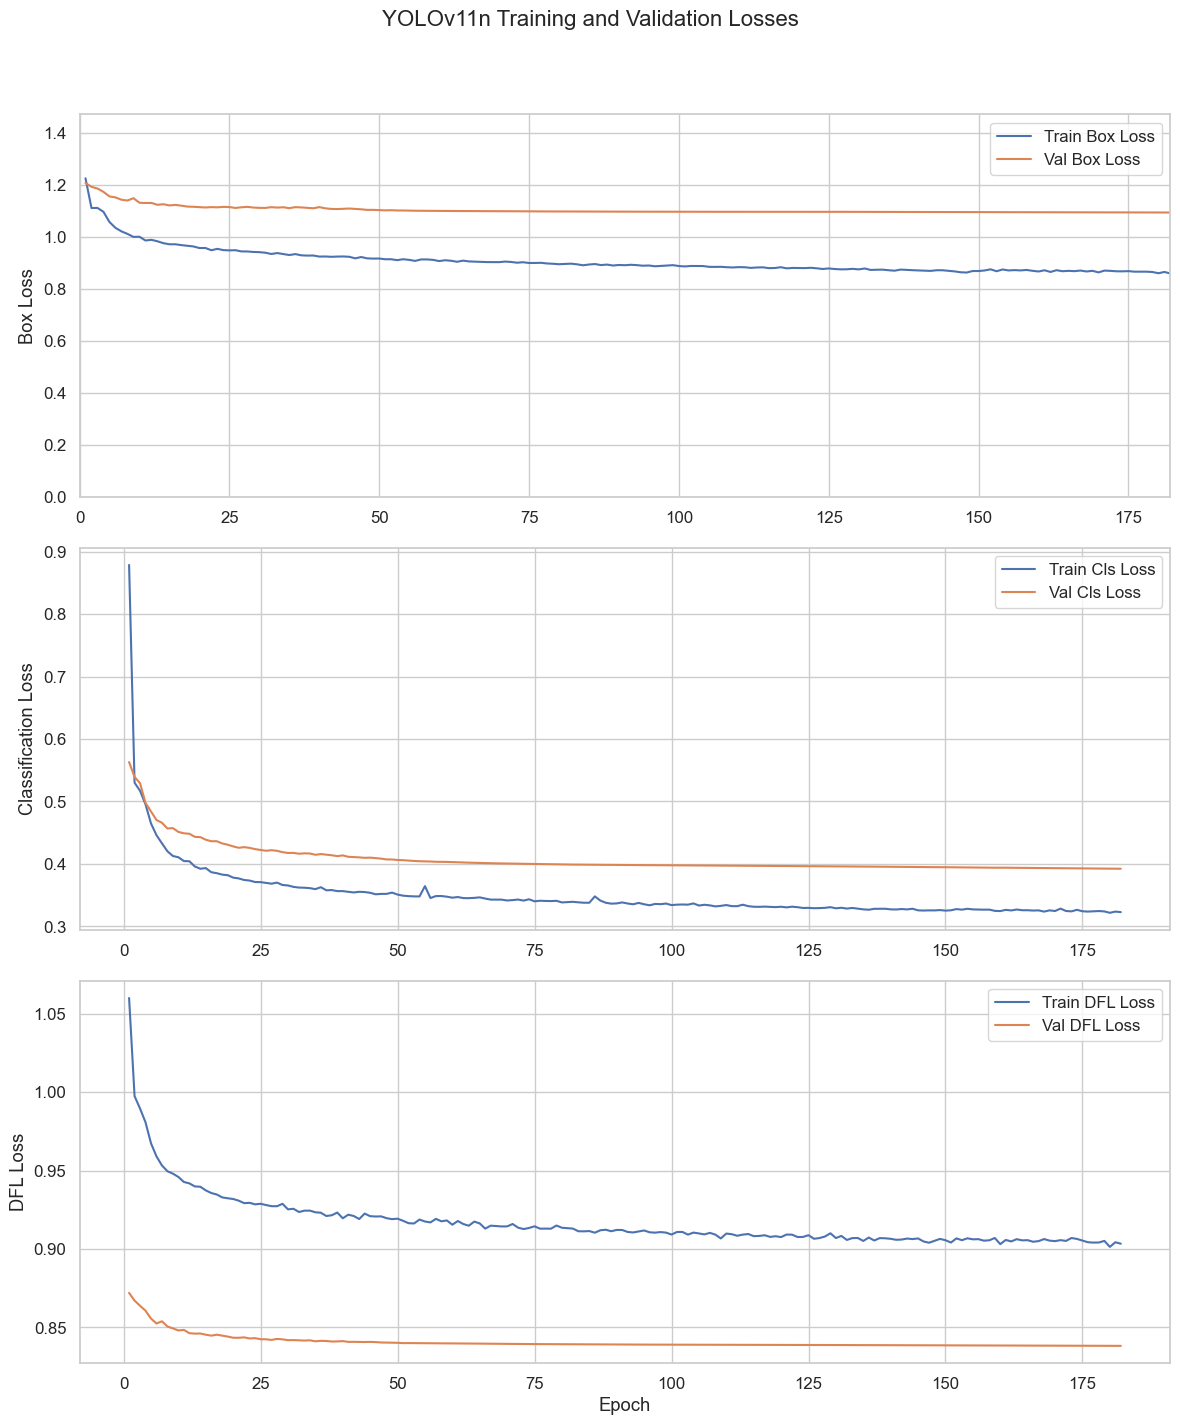

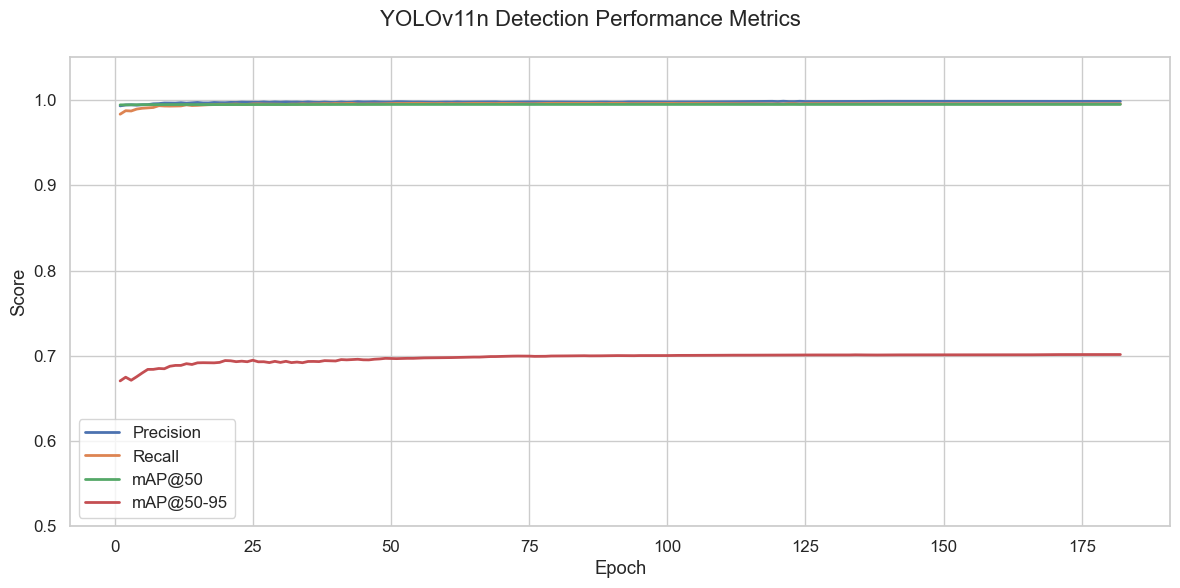

{'Epoch': 177,
 'Precision': 0.99844,
 'Recall': 0.99558,
 'mAP@50': 0.99485,
 'mAP@50-95': 0.70147,
 'Val Box Loss': 1.09436,
 'Val Cls Loss': 0.39259,
 'Val DFL Loss': 0.83824}

In [5]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'results.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows to understand the structure
df.info(), df.head()


import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('YOLOv11n Training and Validation Losses', fontsize=16)

# Plot losses
axes[0].plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
axes[0].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
axes[0].set_ylabel('Box Loss')
axes[0].legend()

# Dynamically extend y-axis scale
max_loss = max(df['train/box_loss'].max(), df['val/box_loss'].max())
axes[0].set_ylim(0, max_loss * 1.2)  # Extend 20% above the maximum loss

# Optionally adjust x-axis to match epochs
axes[0].set_xlim(0, df['epoch'].max())


axes[1].plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
axes[1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
axes[1].set_ylabel('Classification Loss')
axes[1].legend()

axes[2].plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
axes[2].plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
axes[2].set_ylabel('DFL Loss')
axes[2].set_xlabel('Epoch')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot Precision, Recall, and mAP over Epochs
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('YOLOv11n Detection Performance Metrics', fontsize=16)

ax.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', linewidth=2)
ax.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', linewidth=2)
ax.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50', linewidth=2)
ax.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95', linewidth=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.set_ylim(0.5, 1.05)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the best epoch based on highest mAP@50-95
best_epoch_idx = df['metrics/mAP50-95(B)'].idxmax()
best_epoch_data = df.loc[best_epoch_idx]

# Extract key values
best_epoch = int(best_epoch_data['epoch'])
best_metrics = {
    'Epoch': best_epoch,
    'Precision': best_epoch_data['metrics/precision(B)'],
    'Recall': best_epoch_data['metrics/recall(B)'],
    'mAP@50': best_epoch_data['metrics/mAP50(B)'],
    'mAP@50-95': best_epoch_data['metrics/mAP50-95(B)'],
    'Val Box Loss': best_epoch_data['val/box_loss'],
    'Val Cls Loss': best_epoch_data['val/cls_loss'],
    'Val DFL Loss': best_epoch_data['val/dfl_loss']
}

best_metrics



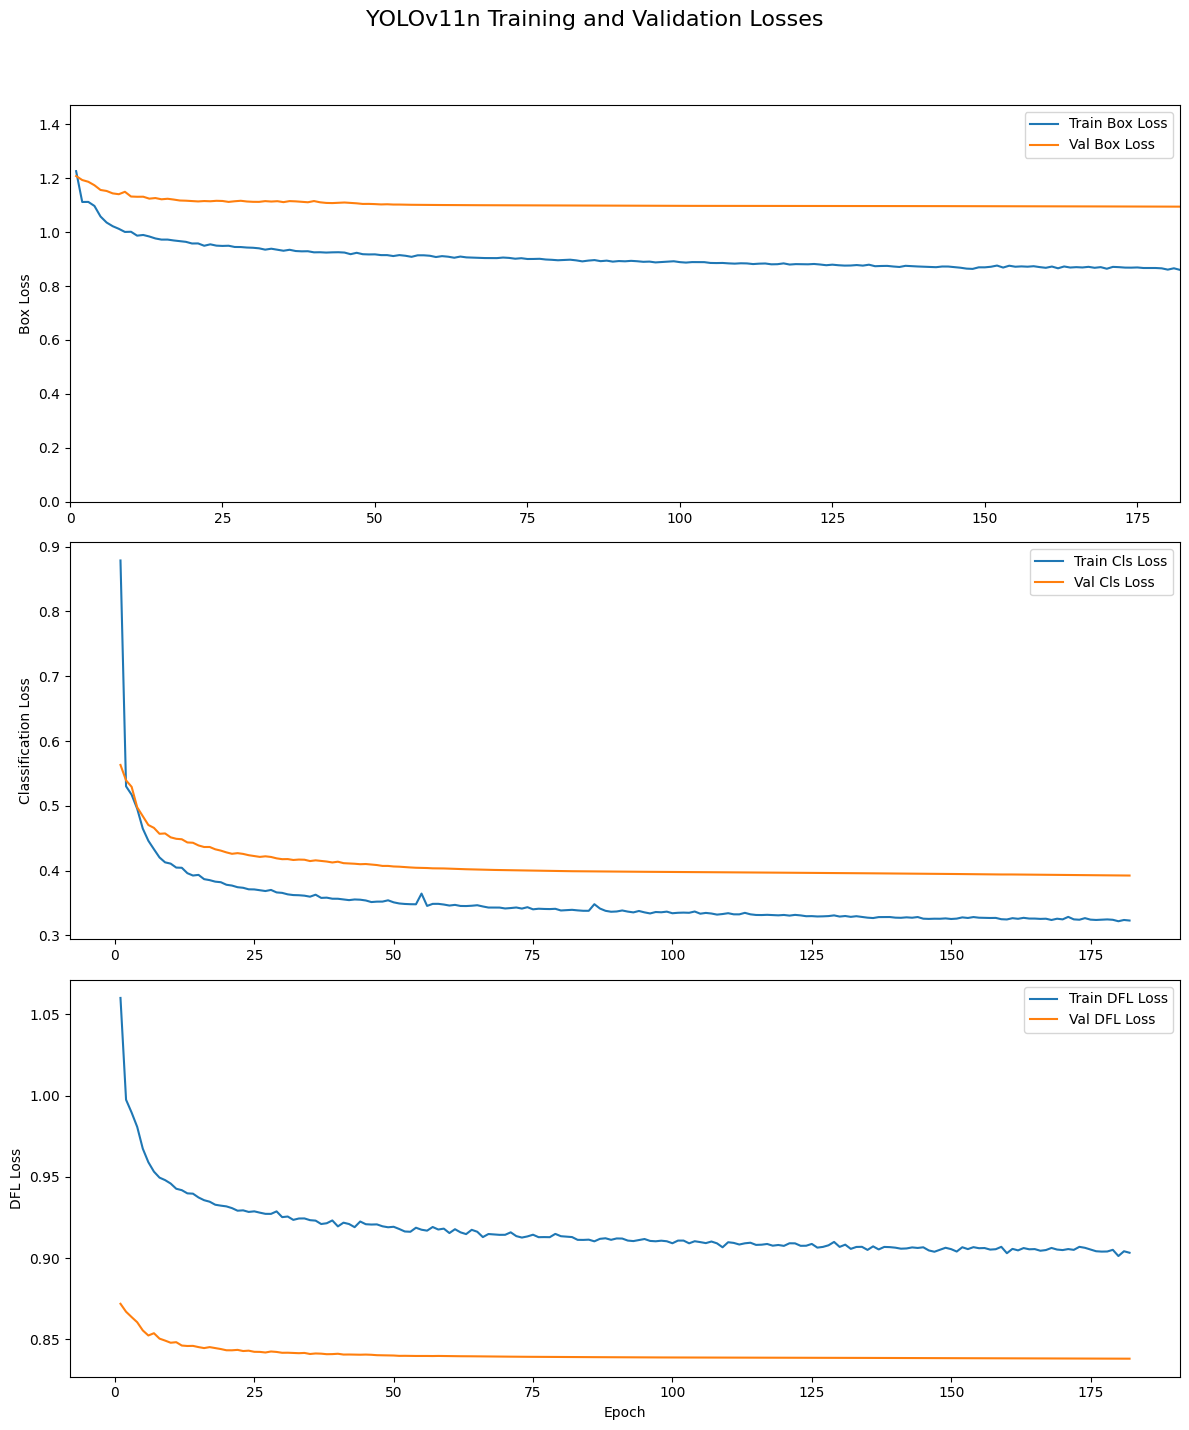

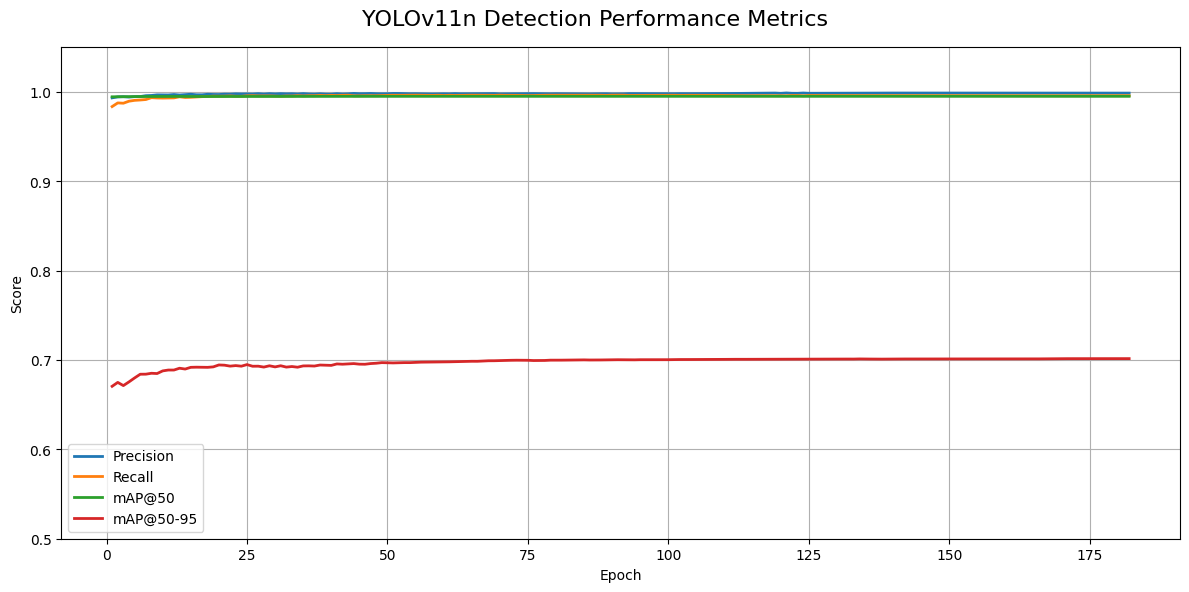

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load actual training results from YOLOv11n (Ultralytics format)
df = pd.read_csv("results.csv")

# Set up subplots for losses
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('YOLOv11n Training and Validation Losses', fontsize=16)

# Plot box loss
axes[0].plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
axes[0].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
axes[0].set_ylabel('Box Loss')
axes[0].legend()
max_box_loss = max(df['train/box_loss'].max(), df['val/box_loss'].max())
axes[0].set_ylim(0, max_box_loss * 1.2)
axes[0].set_xlim(0, df['epoch'].max())

# Plot classification loss
axes[1].plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
axes[1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
axes[1].set_ylabel('Classification Loss')
axes[1].legend()

# Plot DFL loss
axes[2].plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
axes[2].plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
axes[2].set_ylabel('DFL Loss')
axes[2].set_xlabel('Epoch')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot performance metrics
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('YOLOv11n Detection Performance Metrics', fontsize=16)

ax.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', linewidth=2)
ax.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', linewidth=2)
ax.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50', linewidth=2)
ax.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95', linewidth=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.set_ylim(0.5, 1.05)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


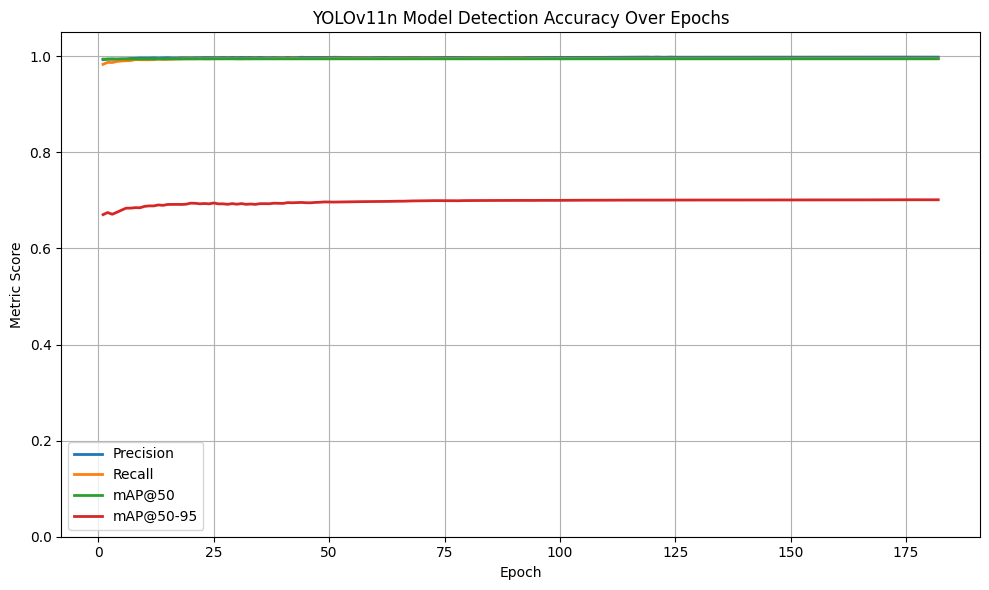

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your training results
df = pd.read_csv('results.csv')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', linewidth=2)
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', linewidth=2)
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50', linewidth=2)
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95', linewidth=2)

plt.title('YOLOv11n Model Detection Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

